In [1]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

Find the homography matrix that transforms image1 to image 2 and plot the results

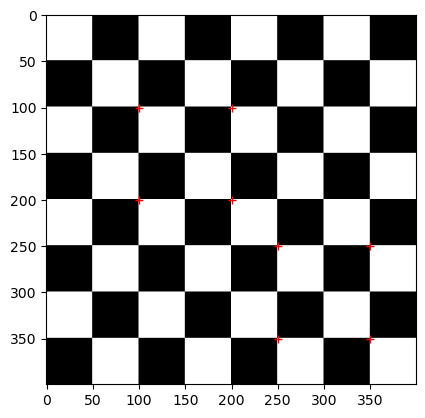

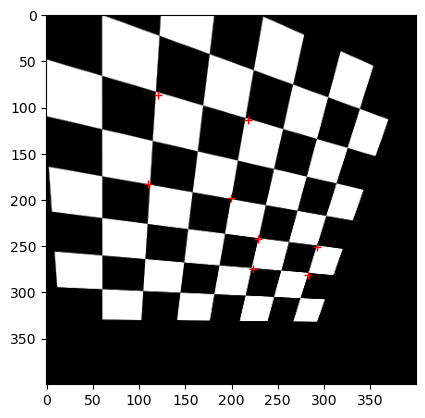

In [7]:
image1 = cv2.imread('data/images/checkerboard1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('data/images/checkerboard2.png', cv2.IMREAD_GRAYSCALE)

pts1 = np.array([[100, 100],[100, 200], [200, 100], [200,200], 
                 [250, 250],[250, 350], [350, 250], [350,350]]).T
pts2 = np.array([(120, 86), (218, 114), (110, 183), (199, 198),
                (229, 242), (292, 251), (223, 275), (283, 281)]).T

plt.imshow(image1, cmap='gray')
plt.plot(pts1[0,:], pts1[1,:],'r+')
plt.show()
plt.imshow(image2, cmap='gray')
plt.plot(pts2[0,:], pts2[1,:],'r+')

Use the first 4 points to find H and apply the transformation to the image to compare

In [50]:
input_pts = np.array(pts1[:,:4], dtype=np.float32).T
output_pts = np.array(pts2[:,:4], dtype=np.float32).T
H = cv2.getPerspectiveTransform(input_pts, output_pts) 


In [22]:
print(H)

[[ 5.70432357e-02  1.71438982e+00 -1.47792887e+01]
 [ 1.63243724e+00  5.81966527e-01 -1.05079498e+02]
 [ 1.74860530e-03  1.78172943e-03  1.00000000e+00]]


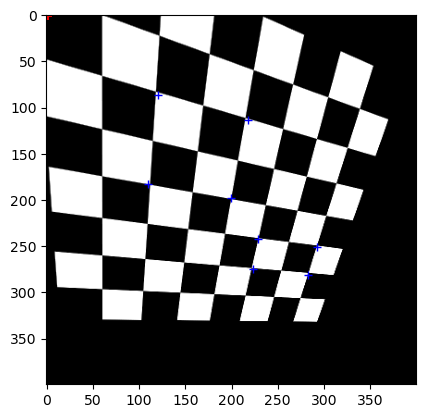

In [52]:

# inputs = np.array(pts1[:,:,np.newaxis], dtype=np.float32).T
inputs = pts1.T.reshape(-1,1,2).astype(np.float32)

#pts3 = cv2.perspectiveTransform(inputs, H)
pts3 = cv2.warpPerspective(inputs, H, (image1.shape[1], image1.shape[0]))

plt.imshow(image2, cmap='gray')
plt.plot(pts3[:,:,0], pts3[:,:,1],'r+')
plt.plot(pts2[0,:], pts2[1,:],'b+')
plt.show()

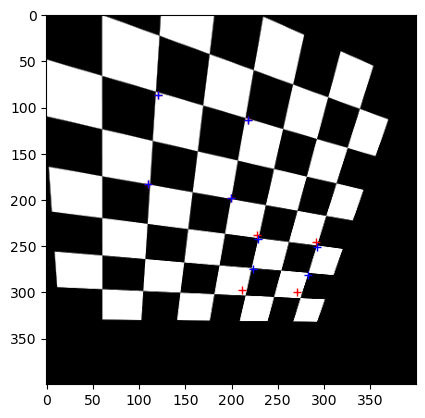

In [53]:
inputs1 = np.array(pts1[:,:,np.newaxis], dtype=np.float32).T

pts4 = cv2.perspectiveTransform(inputs1, H)

plt.imshow(image2, cmap='gray')
plt.plot(pts4[:,:,0], pts4[:,:,1],'r+')
plt.plot(pts2[0,:], pts2[1,:],'b+')
plt.show()